In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#загружаем файлв в датафреймы
studentRegistration = pd.read_csv('studentRegistration.csv')
studentAssessment = pd.read_csv('studentAssessment.csv')
courses = pd.read_csv('courses.csv')
assessments = pd.read_csv('assessments.csv')

In [3]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [4]:
print(studentRegistration.code_module.unique())
print(studentRegistration.code_presentation.unique())
print(studentRegistration.id_student.nunique())

['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
['2013J' '2014J' '2013B' '2014B']
28785


В таблице studentRegistration (времени регистрации студентов на курс) зафиксировано 28785 студентов, зарегистрированных на 7 различных курсов за 4 семестра

In [5]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [6]:
print(studentAssessment.id_assessment.nunique())
print(studentAssessment.id_student.nunique())

188
23369


В таблице studentAssessment (результаты тестов) зафиксировано 23369 студентов, которые сдавали 1752 различных экзамена

In [7]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [8]:
print(courses.code_module.unique())
print(courses.code_presentation.unique())

['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
['2013J' '2014J' '2013B' '2014B']


В таблице courses (списка предметов по семестрам) зафиксировано 7 предметов и 4 семестра

In [9]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [10]:
print(assessments.code_module.unique())
print(assessments.code_presentation.unique())
print(assessments.id_assessment.nunique())
print(assessments.assessment_type.unique())

['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
['2013J' '2014J' '2013B' '2014B']
206
['TMA' 'Exam' 'CMA']


В таблице assessments (оценки по тестам) зафиксировано 7 предметов, 4 семестра, 206 тестов, 3 типа тестов(от преподавателя, компьютерный тест, экзамен)

# 1. Сколько студентов успешно сдали только один курс

Курсом будем считать предмет, который завершается хотя бы одним экзаменом в семестре. потому что в таблице assesments каждый предмет в семестре завершается экзаменом. Т.е. если предмет длится 2 семестра и имеет 2 экзамена, то это будет засчитано как 2 курса.

In [11]:
#видим, что экзамены завершают курс
assessments.query("code_module=='AAA'")

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


In [12]:
#присоединим к таблице с оценками студентов за тесты, названия предметов
studentAssessment_full = studentAssessment.merge(assessments, on='id_assessment')

#создадим колонку с кол-вом баллов, которые будут учитываться на момент экзамена (т.е. учитывая вес теста)
studentAssessment_full['final_score'] = studentAssessment_full.score * (studentAssessment_full.weight/100)
studentAssessment_full

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,final_score
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,7.8
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,7.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,7.2
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,6.9
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,7.9
...,...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0,0.0
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0,0.0
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0,0.0
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0,0.0


Обнаружилось, что некоторые тесты имеют нулевой вес.

Возможно это баг заполнения данных. Хорошо бы спросить у дата инженеров про этот момент.

In [13]:
#кол-во студентов у которых зафиксированы нулевые веса в тестах
studentAssessment_full.query("weight == 0").id_student.nunique()

8691

In [14]:
#кол-во тестов на которых зафиксированы нулевые веса
studentAssessment_full.query("weight == 0").id_assessment.nunique()

56

Найдем результаты каждого из тестов по каждому студенту

In [15]:
studentAssessment_full.groupby(['id_student', 
                                'code_presentation', 
                                'code_module', 
                                'id_assessment', 
                                'assessment_type'],
                              as_index=False) \
                        .agg({'weight':'sum', 'final_score':'sum'}) \
                        .sort_values(by='id_student') \
                        .head()

,id_student,code_presentation,code_module,id_assessment,assessment_type,weight,final_score
0,6516,2014J,AAA,1758,TMA,10.0,6.0
1,6516,2014J,AAA,1759,TMA,20.0,9.6
2,6516,2014J,AAA,1760,TMA,20.0,12.6
3,6516,2014J,AAA,1761,TMA,20.0,12.2
4,6516,2014J,AAA,1762,TMA,30.0,23.1


In [16]:
#в этой таблице тесты, кроме экзамена, объединим в один тип Test, а экзамены оставим отдельной категорией
studentAssessment_full['assessment_type'].where(~(studentAssessment_full.assessment_type != 'Exam'), other='Test', inplace=True)

In [17]:
studentAssessment_full.groupby(['id_student', 
                                'code_presentation', 
                                'code_module', 
                                'assessment_type'],
                              as_index=False) \
                        .agg({'weight':'sum', 'final_score':'sum'}) \
                        .sort_values(by='id_student') \
                        .head(11)

,id_student,code_presentation,code_module,assessment_type,weight,final_score
0,6516,2014J,AAA,Test,100.0,63.50
1,8462,2013J,DDD,Test,40.0,34.90
2,8462,2014J,DDD,Test,50.0,43.00
3,11391,2013J,AAA,Test,100.0,82.40
4,23629,2013B,BBB,Test,25.0,16.69
5,23698,2014J,CCC,Exam,100.0,80.00
6,23698,2014J,CCC,Test,100.0,69.97
7,23798,2013J,BBB,Test,100.0,89.24
8,24186,2014B,GGG,Test,0.0,0.00
9,24213,2014B,DDD,Exam,100.0,58.00


In [18]:
#таблица кол-ва успешно сданных экзаменов по каждому студенту
students_success_exams_counts = studentAssessment_full.query("assessment_type == 'Exam' and score >= 40") \
                                                        .groupby('id_student', as_index=False) \
                                                        .agg({'assessment_type':'count'}) \
                                                        .sort_values(by='assessment_type')
students_success_exams_counts

,id_student,assessment_type
0,23698,1
2694,627399,1
2695,627401,1
2696,627417,1
2697,627453,1
...,...,...
3612,1442991,2
3610,1440467,2
462,355935,2
1580,563016,2


In [19]:
#кол-во студентов, успешно сдавших один экзамен, а значит и успешно завершили только один курс 
# (т.к. курс|семестр завершается экзаменом)
students_success_exams_counts.query("assessment_type == 1").id_student.count()

3802

### Сколько студентов успешно сдали только один курс: 
### ответ: 3802 студентов

# 2. Самый сложный и самый легкий экзамены по завершаемости

Завершаемость = кол-во успешных сдач / общее кол-во попыток

In [20]:
#Экзамены, которые сданы успешно
success_exams_count = studentAssessment_full.query("assessment_type == 'Exam' and score >= 40") \
                                            .groupby('id_assessment', as_index=False) \
                                            .agg({'assessment_type':'count'})
success_exams_count

,id_assessment,assessment_type
0,24290,664
1,24299,1019
2,25340,504
3,25354,878
4,25361,485
5,25368,842


In [21]:
#общее кол-во сдач экзаменов
exams_count = studentAssessment_full.query("assessment_type == 'Exam'") \
                                            .groupby('id_assessment', as_index=False) \
                                            .agg({'assessment_type':'count'})
exams_count

,id_assessment,assessment_type
0,24290,747
1,24299,1168
2,25340,602
3,25354,968
4,25361,524
5,25368,950


In [22]:
#создадим общую таблицу по cдачам экзаменов с новой колонкой comlition
exams_completion = exams_count.merge(success_exams_count, on='id_assessment')
exams_completion = exams_completion.rename(columns={'assessment_type_x': 'total', 'assessment_type_y': 'success'})
exams_completion['completion'] = round(exams_completion.success / exams_completion.total, 2) 
exams_completion.sort_values(by='completion')

,id_assessment,total,success,completion
2,25340,602,504,0.84
1,24299,1168,1019,0.87
0,24290,747,664,0.89
5,25368,950,842,0.89
3,25354,968,878,0.91
4,25361,524,485,0.93


In [23]:
#самый легкий экзамен
assessments.query("id_assessment == 25361")

,code_module,code_presentation,id_assessment,assessment_type,date,weight
101,DDD,2014B,25361,Exam,241.0,100.0


In [24]:
#самый сложный экзамен
assessments.query("id_assessment == 25340")

,code_module,code_presentation,id_assessment,assessment_type,date,weight
87,DDD,2013B,25340,Exam,240.0,100.0


In [25]:
#считаем кол-во успешных прохождений тестов за курсы (за предметы по семестрам)
courses_success = studentAssessment_full.query("score >= 40") \
                    .groupby(['code_presentation', 'code_module'], as_index=False) \
                    .agg({'assessment_type':'count'})

In [26]:
#считаем кол-во прохождений тестов за курсы (за предметы по семестрам)
courses_total = studentAssessment_full \
                    .groupby(['code_presentation', 'code_module'], as_index=False) \
                    .agg({'assessment_type':'count'})
courses_total.head()

,code_presentation,code_module,assessment_type
0,2013B,BBB,11256
1,2013B,DDD,10373
2,2013B,FFF,12195
3,2013J,AAA,1633
4,2013J,BBB,14375


In [27]:
#Обобщающая таблица прохождений курсов (всего и успешных)
courses_complition = courses_success.merge(courses_total, on=['code_presentation','code_module'])

courses_complition = courses_complition.rename(columns={'assessment_type_x': 'success', 'assessment_type_y': 'total'})
courses_complition['complition'] = round(courses_complition.success / courses_complition.total, 3) 
courses_complition.sort_values(by='complition').head(3)

,code_presentation,code_module,success,total,complition
16,2014J,BBB,6548,7408,0.884
10,2014B,CCC,6673,7489,0.891
11,2014B,DDD,4067,4542,0.895


In [28]:
courses_complition.sort_values(by='complition').tail(3)

,code_presentation,code_module,success,total,complition
20,2014J,FFF,15903,16184,0.983
19,2014J,EEE,3181,3229,0.985
4,2013J,BBB,14180,14375,0.986


## Ответ:
Курс с самой низкой завершаемостью: предмет "BBB" семестр "2014J"

Курс с самой высокой завершаемостью: предмет "BBB" семестр "2013J"

Экзамен  с самой низкой завершаемостью: предмет "DDD" семест "2013B" экзамен "25340"

Экзамен  с самой высокой завершаемостью: предмет "DDD" семест "2014B" экзамен "25361"

# 3. Средний срок успешной сдачи экзаменов по предметам

Не будем разделять предметы по семестрам, т.к. в в условии это не оговорено

In [29]:
#выберем успешные сдачи тестов (score>= 40) по типу Экзамен
studentAssessment_exams = studentAssessment_full.query("assessment_type == 'Exam' and score >= 40")

studentAssessment_exams.groupby(['code_module'], as_index=False).agg({'date_submitted':'mean'})

,code_module,date_submitted
0,CCC,239.345217
1,DDD,237.976006


## Ответ:
Средний срок сдачи экзаменов по предметам:

CCC = 239 дней

DDD = 238 дней

### комментарий
В файле assessments записи по сдаче экзаменов имеются только для двух курсов: ССС и DDD. По формулировке задания (найти срок сдачи экзаменов) остановимся на этом.

А в целом, можно сделать 2 перположения: 

1) экзамены по предметам ССС и DDD являются обязательными, не зависимо от успешности сдачи остальных тестов на курсе; а для зачета по остальным предметам достаточно набрать определенное кол-во баллов тестами во время семестра. И, преодолев порог для автоматического зачета по курсу, сутуденту нет необходимости сдавать экзамен.

2) некоторые студенты, которые сдавали экзамен (4097 из общего числа 23369) не набрали нужно кол-во баллов для "автомата" на экзамене по этоим двум предметам

# 4. ТОП-3 самых популярных предметов и ТОП-3 предметов по оттоку

In [30]:
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [31]:
#выведем все предметы
studentRegistration.code_module.unique()          

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [32]:
#выведем все семестры
studentRegistration.code_presentation.unique()   

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

In [33]:
#кол-во студентов на программах
studentRegistration.id_student.nunique()

28785

In [34]:
#кол-во программ, на которые записались студенты
students_count = studentRegistration.date_registration.count()
students_count

32548

In [35]:
#кол-во программ, которые студенты покинули
students_left_count = studentRegistration.date_unregistration.count()  
students_left_count

10072

Чтобы посчитать сколько раз студнеты, записались на предмет, будем использовать групировку по столбцу с названием предмета и считать кол-во строк по дате записи на курс. 

Отсортируем по убыванию и возьмем первые 3 строки - так найдем самые "многочисленные предметы"

In [36]:
studentRegistration.groupby('code_module', as_index=False).agg({'date_registration':'count'}) \
                    .rename(columns={'date_registration':'registrations_count'}) \
                    .sort_values(by='registrations_count', ascending=False)

,code_module,registrations_count
1,BBB,7900
5,FFF,7751
3,DDD,6257
2,CCC,4426
4,EEE,2932
6,GGG,2534
0,AAA,748


Чтобы посчитать сколько раз студенты "отписались" от предмета, будем использовать групировку по столбцу с названием предмета и считать кол-во строк по дате "unregistration". 

Отсортируем по убыванию.

In [37]:
unregistrations = studentRegistration.groupby('code_module', as_index=False).agg({'date_unregistration':'count'}) \
                    .rename(columns={'date_unregistration':'unregistrations_count'}) \
                    .sort_values(by='unregistrations_count', ascending=False)
unregistrations

,code_module,unregistrations_count
5,FFF,2380
1,BBB,2377
3,DDD,2235
2,CCC,1947
4,EEE,718
6,GGG,289
0,AAA,126


## Ответ:
Самые популярные предметы по кол-ву регистраций (в порядке убывания):

    BBB
    FFF
    DDD

Самые популярные предметы по кол-ву отчислений (в порядке убывания):

    FFF
    BBB
    DDD
    
### комментарий
Видим, что предметами с самым большим оттком являются предметы и с самым большим числом регистраций, что вполне логично - чем больше людей на курсе, тем больше вероятность, что кто-то "отпишется"

В первую очередь образовательной платформе необходимо уделить большее внимание предмету FFF - отток по нему, можно сказать, такой же как и по BBB, но на FFF всего записалось на 150 человек меньше. Т.е. можно сделать вывод, что FFF не нравится студентам больше, чем BBB

# 5. Семестры с самой низкой завершаемостью и долгими средними сроками сдачи курсов

In [38]:
# возьмем уже имеющуюся таблицу exams_completion с процентами успешно сданных экзаменов
# (т.к. определили, что курс завершается экзаменом) и сджоиним с assessments, чтобы определить семестр
# с самой низкой завершаемостью.

semester_complition = exams_completion.merge(assessments, on ='id_assessment')

semester_complition = exams_completion.merge(assessments, on ='id_assessment')
semester_complition = semester_complition[['id_assessment', 'total','success','completion','code_presentation']]
semester_complition

,id_assessment,total,success,completion,code_presentation
0,24290,747,664,0.89,2014B
1,24299,1168,1019,0.87,2014J
2,25340,602,504,0.84,2013B
3,25354,968,878,0.91,2013J
4,25361,524,485,0.93,2014B
5,25368,950,842,0.89,2014J


In [39]:
# имеем таблицу с успешными сдачами экзаменов studentAssessment_exams
# найдем по ней среднее кол-во дней сдачи эксаменов по семестрам
studentAssessment_exams.groupby('code_presentation', as_index=False) \
                        .agg({'date_submitted': 'mean'}) \
                        .sort_values(by='date_submitted', ascending=False)

,code_presentation,date_submitted
3,2014J,243.680279
1,2013J,239.509112
2,2014B,232.997389
0,2013B,230.164683


## Ответ:
Семестр с самой низкой завершаемостью:

    2014B

Семестр с самым долгим средним сроком завершаемости курсов:

    2014J

# 6. RFM-анализ

Опередлимся с метриками:

    R - среднее время сдачи одного экзамена
    F - завершаемость курсов
    M - среднее кол-во баллов за экзамен
    


In [40]:
# рассчитаем R F M вцелом по всем данным

#среднее время сдачи экзамена
R_total = studentAssessment_full.query("assessment_type == 'Exam' and score >= 40") \
                                .groupby('assessment_type', as_index=False) \
                                .agg({'date':'mean'})
print('среднее время сдачи одного экзамена', round(R_total['date'][0]), 'дней')

среднее время сдачи одного экзамена 250 дней


In [41]:
print('среднее завершаемость курсов:', round(exams_completion.completion.mean(), 2))

среднее завершаемость курсов: 0.89


In [42]:
M_total = studentAssessment_full.query("assessment_type == 'Exam' and score >= 40") \
                                .groupby('assessment_type', as_index=False) \
                                .agg({'score':'mean'})
print('среднее кол-во баллов за экзамен:', round(M_total['score'][0],2))

среднее кол-во баллов за экзамен: 70.1


In [43]:
#создадим полную таблицу по сдачам экзаменов студентами

studentAssessment_full_length = studentAssessment_full.merge(courses, on=['code_module','code_presentation'])
studentAssessment_full_length = studentAssessment_full_length.drop(columns=['weight', 'final_score'])
studentAssessment_full_length = studentAssessment_full_length.query("assessment_type == 'Exam'") #т.к. RFM идет по экзаменам

Порядок семестров выберем следующий 2013J - 2013В - 2014J - 2014B (число будет ссчитать годом, а J от первого месяца года - January)

Найдем максимальную дату в каждом семестре

In [44]:
#максимальная дата сдачи экзаменов в семестре
studentAssessment_full_length.groupby('code_presentation', as_index=False).agg({'date_submitted':'max'})

,code_presentation,date_submitted
0,2013B,248
1,2013J,255
2,2014B,266
3,2014J,285


In [45]:
#минимальная дата сдачи экзамена в семестре
studentAssessment_full_length.groupby('code_presentation', as_index=False).agg({'date_submitted':'min'})

,code_presentation,date_submitted
0,2013B,229
1,2013J,236
2,2014B,230
3,2014J,242


Из полученных таблиц можно сделать вывод, что все студенты сдают экзамены в том семестре, который начали, без переноса на другие. сильно позже завершения курса (в конце следующего семестра) а некоторые получают зачет даже до начала семестра (и это не только те, кому перезачислили курс с прошлого семестра)

In [46]:
#создадим таблицу "дат" начала семестрой от самой первой записи в таблице (базе данных)
max_2013J = studentAssessment_full_length.query("code_presentation == '2013J'").agg({'date_submitted':'max'})[0]
max_2013B = studentAssessment_full_length.query("code_presentation == '2013B'").agg({'date_submitted':'max'})[0]
max_2014J = studentAssessment_full_length.query("code_presentation == '2014J'").agg({'date_submitted':'max'})[0]
max_2014B = studentAssessment_full_length.query("code_presentation == '2014B'").agg({'date_submitted':'max'})[0]

semester_date = pd.DataFrame({'code_presentation': ['2013J', '2013B', '2014J', '2014B'], \
                                     'max_length': [max_2013J, max_2013B, max_2014J,max_2013B], \
                                    'start_date' : [0 \
                                                    , max_2013J+1 \
                                                    , max_2013J + max_2013B + 1 \
                                                    , max_2013J + max_2013B + +max_2014J + 1]})


In [47]:
# max_length - последний день в семестре, когда был сдан экзамен
# start_date - "дата" начала семестра с момента первой записи в таблице (базе данных)
semester_date

,code_presentation,max_length,start_date
0,2013J,255,0
1,2013B,248,256
2,2014J,285,504
3,2014B,248,789


max_length - принимаю как дату завершения семестра. т.к. огромных отклонений от значений столбца module_presentation_length нет, однако в последнем, эта продолжительность больше похожа не на длительность семестра (как в описании данных) а на продолжительность предмета, т.к. длительности разные для каждого предмета в рамках одного семестра. Поэтому не считаю эту цивру продолжительностьб семетра целиком. 

In [48]:
studentAssessment_full_length = studentAssessment_full_length.merge(semester_date, on='code_presentation')
studentAssessment_full_length

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,module_presentation_length,max_length,start_date
0,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,241,248,789
1,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,241,248,789
2,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,241,248,789
3,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,241,248,789
4,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,241,248,789
...,...,...,...,...,...,...,...,...,...,...,...,...
4954,25354,555239,237,0,96.0,DDD,2013J,Exam,261.0,261,255,0
4955,25354,555791,241,0,42.0,DDD,2013J,Exam,261.0,261,255,0
4956,25354,556539,237,0,71.0,DDD,2013J,Exam,261.0,261,255,0
4957,25354,557474,237,0,20.0,DDD,2013J,Exam,261.0,261,255,0


In [49]:
#добавляем, так сказать, календарную дату сдачи экзамена: 
# к дате сдачи от начала семестра добавляем дату начала семестра, которую рассчитали в таблице semester_date

studentAssessment_full_length['exam_date'] = studentAssessment_full_length.start_date + studentAssessment_full_length.date_submitted
studentAssessment_full_length = studentAssessment_full_length.drop(columns=['assessment_type','date','is_banked'])
studentAssessment_full_length

,id_assessment,id_student,date_submitted,score,code_module,code_presentation,module_presentation_length,max_length,start_date,exam_date
0,24290,558914,230,32.0,CCC,2014B,241,248,789,1019
1,24290,559706,234,78.0,CCC,2014B,241,248,789,1023
2,24290,559770,230,54.0,CCC,2014B,241,248,789,1019
3,24290,560114,230,64.0,CCC,2014B,241,248,789,1019
4,24290,560311,234,100.0,CCC,2014B,241,248,789,1023
...,...,...,...,...,...,...,...,...,...,...
4954,25354,555239,237,96.0,DDD,2013J,261,255,0,237
4955,25354,555791,241,42.0,DDD,2013J,261,255,0,241
4956,25354,556539,237,71.0,DDD,2013J,261,255,0,237
4957,25354,557474,237,20.0,DDD,2013J,261,255,0,237


In [50]:
#определим отправную дату "сегодня" - возьмем как максимальная дата сдачи экзамена + 1
now = studentAssessment_full_length.exam_date.max()+1
now

1056

In [51]:
#возьмем период по которому будем проводить RFM-анализ - по всем данным (1054 дня), 
#чтобы посмотреть поведение учитывающее все потоки
period = studentAssessment_full_length.exam_date.max()
period

1055

In [52]:
#найдем завершаемость курсов каждым студентом

#всего попыток сдать экзамены каждым студентом
students_exams_count = studentAssessment_full_length.groupby('id_student', as_index=False) \
                                            .agg({'id_assessment':'count'})\
                                            .rename(columns={'id_assessment':'total'})

#успешных попыток сдать экзамены каждым студентом
students_exams_count_success = studentAssessment_full_length.query("score >=40 ")\
                    .groupby('id_student', as_index=False) \
                    .agg({'id_assessment':'count'}) \
                    .rename(columns={'id_assessment':'success'})

#объединяем таблицы в единую по завершаемости
students_exams_count = students_exams_count.merge(students_exams_count_success, on='id_student', how='left')



students_exams_count['completion'] = students_exams_count.success / students_exams_count.total 

#заполним нулями пустые ячейки
students_exams_count = students_exams_count.fillna(0)

students_exams_count.sort_values('completion', ascending=False)

,id_student,total,success,completion
0,23698,1,1.0,1.0
3020,624927,2,2.0,1.0
3026,625077,1,1.0,1.0
3025,625067,1,1.0,1.0
3024,625035,1,1.0,1.0
...,...,...,...,...
955,470921,1,0.0,0.0
3596,652619,1,0.0,0.0
2607,602365,1,0.0,0.0
3591,652267,1,0.0,0.0


In [53]:
students_exams_count.query("id_student in ['2661870','2655683','2661870','628376','628777','23698','2691861']")

,id_student,total,success,completion
0,23698,1,1.0,1.0
3133,628376,2,2.0,1.0
3147,628777,1,1.0,1.0
4586,2655683,1,0.0,0.0
4592,2661870,1,0.0,0.0
4622,2691861,1,0.0,0.0


In [54]:
#создадим таблицу student_rfm, куда будем собирать параметры RFM по каждому студенту
#не будем убирать неуспешные экзамены ( <40 баллов), чтобы можно было понять динамику попыток сдать экзамены

#среднее по сроку сдачи и средний балл
student_rfm = studentAssessment_full_length.groupby('id_student', as_index=False) \
                                        .agg({'date_submitted':'mean', 'score':'mean'}) \
                                        .rename(columns={'date_submitted':'pass_date_mean_R','score':'score_M'})


student_rfm = student_rfm.merge(students_exams_count, on='id_student').rename(columns={'completion':'completion_F'})

student_rfm = student_rfm[['id_student','pass_date_mean_R','completion_F', 'score_M']]
student_rfm

,id_student,pass_date_mean_R,completion_F,score_M
0,23698,243.0,1.0,80.0
1,24213,236.0,1.0,58.0
2,27116,243.0,1.0,96.0
3,28046,237.0,1.0,40.0
4,28787,243.0,1.0,44.0
...,...,...,...,...
4628,2694886,236.0,1.0,69.0
4629,2694933,230.0,1.0,73.0
4630,2695608,237.0,1.0,73.0
4631,2697181,230.0,1.0,80.0


In [55]:
# Готова RFM таблица

Разобьем каждый параметр RFM на группы по квантилям

In [56]:
student_rfm.query("completion_F < 100").id_student.count() / student_rfm.id_student.count()

1.0

In [57]:
quintiles = student_rfm[['pass_date_mean_R', 'completion_F', 'score_M']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'pass_date_mean_R': {0.2: 231.0, 0.4: 237.0, 0.6: 242.0, 0.8: 243.5},
 'completion_F': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'score_M': {0.2: 46.200000000000045, 0.4: 60.0, 0.6: 72.0, 0.8: 84.0}}

Видим, что параметр завершаемости (F) во всех интервалах получился одинаковый.
Скорее всего это связано с тем, что завершаемостью ниже 100 процентов обладают ниже 20% всех студентов.
Проверим

In [58]:
#Действительно, заверашемость ниже 100% всего лишь у 12% студентов
student_rfm.query("completion_F < 100").id_student.count() / student_rfm.id_student.count()

1.0

In [59]:
#проверим возможные значения завершаемости
student_rfm.completion_F.unique()

array([1. , 0. , 0.5])

In [60]:
#процент студентов с завешаемость в 50% (получили значение меньше чем 1%)
student_rfm.query("completion_F == 50").id_student.count() / student_rfm.id_student.count()

0.0

In [61]:
#процент студентов с завешаемость в 0% (получили значением в 12%)
student_rfm.query("completion_F == 0").id_student.count() / student_rfm.id_student.count()

0.11569177638679042

In [62]:
#так как неполучается ровными квантилями разбить всех студентов, то этот метод использовать не будем - зададим свою шкалу рангов

#выведем максимальные, минимальные и средние значения RFM. Так лучше поймем как разбивать группы
print('R_max:', student_rfm.pass_date_mean_R.max())
print('R_min:', student_rfm.pass_date_mean_R.min())
print('R_mean:', round(student_rfm.pass_date_mean_R.mean()))
print()
print('F_max:', student_rfm.completion_F.max())
print('F_min:', student_rfm.completion_F.min())
print('F_mean:', round(student_rfm.completion_F.mean()))
print()
print('M_max:', student_rfm.score_M.max())
print('M_min:', student_rfm.score_M.min())
print('M_mean:', round(student_rfm.score_M.mean()))

R_max: 285.0
R_min: 229.0
R_mean: 238

F_max: 1.0
F_min: 0.0
F_mean: 1

M_max: 100.0
M_min: 0.0
M_mean: 65


Теперь необходимо присвоить ранги каждому параметру RFM. По каждому показателю должна быть одинаковая шкала.
В параметре F возможны всего 3 варианта (0, 50% и  100% завершаемости курсов).

Значение 1 - самый плохой показатель, 4-самый лучший для категории.

    Среднее время сдачи экзамена (R)     - чем меньше, тем лучше
    Завершаемость курсов (F)             - чем больше значеним, тем лучше
    Среднее кол-во баллов за экзамен (M) - чем больше, тем лучше

In [63]:
#функция для определения ранга параметра R (большинство студентов попадет в  интервал [235;245], исходя из среднего)
def r_score(x):
    if x <= 235:
        return 3
    elif x <= 245:
        return 2
    else:
        return 1

#функция для определения ранга параметров F
def f_score(x, c):
    if x < 0.5:
        return 1
    elif x < 1:
        return 2
    else:
        return 3   

#функция для определения ранга параметров M (несдача экзамена <40 баллов), отличная сдача экзамена >75 баллов)
def m_score(x, c):
    if x < 40:
        return 1
    elif x <= 55:
        return 2
    elif x <= 75:
        return 3
    else:
        return 4  

In [64]:
student_rfm['R'] = student_rfm['pass_date_mean_R'].apply(lambda x: r_score(x))
student_rfm['F'] = student_rfm['completion_F'].apply(lambda x: f_score(x, 'completion_F'))
student_rfm['M'] = student_rfm['score_M'].apply(lambda x: m_score(x, 'score_M'))

In [65]:
#объединим  все три числа R F M в одно строковое значение, используя функцию "map"
student_rfm['rfm_score'] = student_rfm['R'].map(str) + student_rfm['F'].map(str) + student_rfm['M'].map(str)
student_rfm.head()

,id_student,pass_date_mean_R,completion_F,score_M,R,F,M,rfm_score
0,23698,243.0,1.0,80.0,2,3,4,234
1,24213,236.0,1.0,58.0,2,3,3,233
2,27116,243.0,1.0,96.0,2,3,4,234
3,28046,237.0,1.0,40.0,2,3,2,232
4,28787,243.0,1.0,44.0,2,3,2,232


In [66]:
#кол-во уникальных комбинаций RFM значений
student_rfm.rfm_score.nunique()

18

In [67]:
student_rfm.query("id_student in ['613461','556337','368749','537868','630730','558787','609515']")

,id_student,pass_date_mean_R,completion_F,score_M,R,F,M,rfm_score
583,368749,229.0,0.0,27.0,3,1,1,311
1468,537868,229.0,0.0,29.0,3,1,1,311
1723,556337,229.0,0.0,38.0,3,1,1,311
1777,558787,230.0,1.0,93.0,3,3,4,334
2762,609515,230.0,1.0,88.0,3,3,4,334
2840,613461,230.0,0.0,38.0,3,1,1,311
3202,630730,230.0,0.0,20.0,3,1,1,311


In [68]:
student_rfm.sort_values('rfm_score', ascending=False).head()

,id_student,pass_date_mean_R,completion_F,score_M,R,F,M,rfm_score
2884,617801,234.0,1.0,76.0,3,3,4,334
2817,611879,234.0,1.0,89.0,3,3,4,334
1819,560347,231.0,1.0,78.0,3,3,4,334
1818,560311,232.0,1.0,86.5,3,3,4,334
407,296411,234.0,1.0,76.0,3,3,4,334


In [69]:
#выделим сегменты на основе RFM Оценки

#будем рассматривать оценки R и F, 
#т.к. F(завершаемость) частично включает в себя М (кол-во баллов. если <40, то завершаемости нет)

segt_map = {
    r'11': 'аутсайдеры',
    r'22': 'сдавшиеся_середнячки',
    r'33': 'гении',
    r'12': 'сдавшиеся_неумехи',
    r'13': 'герои',
    r'21': 'среднячки_ленивцы',
    r'23': 'среднячки_хорошисты',
    r'31': 'импульсивные_торопыги',
    r'32': 'сдавшиеся_торопыги'
}

student_rfm['Segment'] = student_rfm['R'].map(str) + student_rfm['F'].map(str)
student_rfm['Segment'] = student_rfm['Segment'].replace(segt_map, regex=True)
student_rfm.head()

,id_student,pass_date_mean_R,completion_F,score_M,R,F,M,rfm_score,Segment
0,23698,243.0,1.0,80.0,2,3,4,234,среднячки_хорошисты
1,24213,236.0,1.0,58.0,2,3,3,233,среднячки_хорошисты
2,27116,243.0,1.0,96.0,2,3,4,234,среднячки_хорошисты
3,28046,237.0,1.0,40.0,2,3,2,232,среднячки_хорошисты
4,28787,243.0,1.0,44.0,2,3,2,232,среднячки_хорошисты


In [70]:
#Построим границы метрик RFM для каждого сегмента
student_rfm_max = student_rfm.groupby('Segment', as_index=False)\
                            .agg({'pass_date_mean_R':'max'\
                                  ,'completion_F':'max'\
                                  ,'score_M':'max'}) \
                            .rename(columns={'pass_date_mean_R':'R_max'\
                                            ,'completion_F':'F_max'\
                                            ,'score_M':'M_max'})

student_rfm_min = student_rfm.groupby('Segment', as_index=False)\
                            .agg({'pass_date_mean_R':'min'\
                                  ,'completion_F':'min'\
                                  ,'score_M':'min'}) \
                            .rename(columns={'pass_date_mean_R':'R_min'\
                                            ,'completion_F':'F_min'\
                                            ,'score_M':'M_min'})

#Объединим в одну таблицу
student_rfm_metrics = student_rfm_max.merge(student_rfm_min, on='Segment')
student_rfm_metrics[['Segment','R_max','R_min','F_max','F_min','M_max','M_min']]

,Segment,R_max,R_min,F_max,F_min,M_max,M_min
0,аутсайдеры,256.0,248.0,0.0,0.0,38.0,0.0
1,гении,234.0,229.0,1.0,1.0,100.0,40.0
2,герои,285.0,245.5,1.0,1.0,100.0,40.0
3,импульсивные_торопыги,235.0,229.0,0.0,0.0,38.0,0.0
4,сдавшиеся_середнячки,243.5,235.5,0.5,0.5,56.0,32.0
5,сдавшиеся_торопыги,233.5,229.5,0.5,0.5,58.0,38.0
6,среднячки_ленивцы,245.0,236.0,0.0,0.0,38.0,0.0
7,среднячки_хорошисты,245.0,235.5,1.0,1.0,100.0,40.0


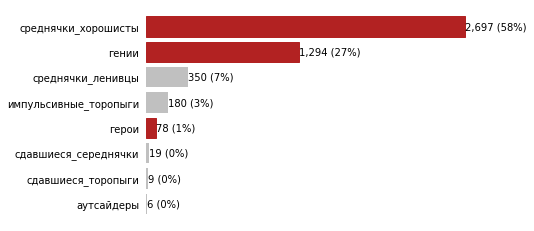

In [71]:
# Построим гистограмму колличества студентов в каждой группе
segments_counts = student_rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['гении', 'герои', 'среднячки_хорошисты']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

По количеству студентов в группах видно, что тех, кто идет в среднем темпе и хорошо сдают экзамены - больше всего. 

Но так же не мало тех, кто сдает все экзамены быстро и на отлично - их 27% от всего кол-ва.

Героев - тех, кто сдает экзамены позже всех (возможно по причине высокой загруженности) и сдают их отлично, всего 1%

А тех, кто не сдал ни одного экзамена и не продолжает обучение всего 6 человек  из больше чем 4х тысяч